In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as em
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [144]:
df=pd.read_csv('C:/Users/Sayan/Downloads/Shoe-Sales.csv')
df.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


In [145]:
df.dtypes

YearMonth     object
Shoe_Sales     int64
dtype: object

In [146]:
df= pd.read_csv('C:/Users/Sayan/Downloads/Shoe-Sales.csv', parse_dates = ['YearMonth'],index_col='YearMonth')

In [147]:
df.dtypes

Shoe_Sales    int64
dtype: object

In [148]:
df.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


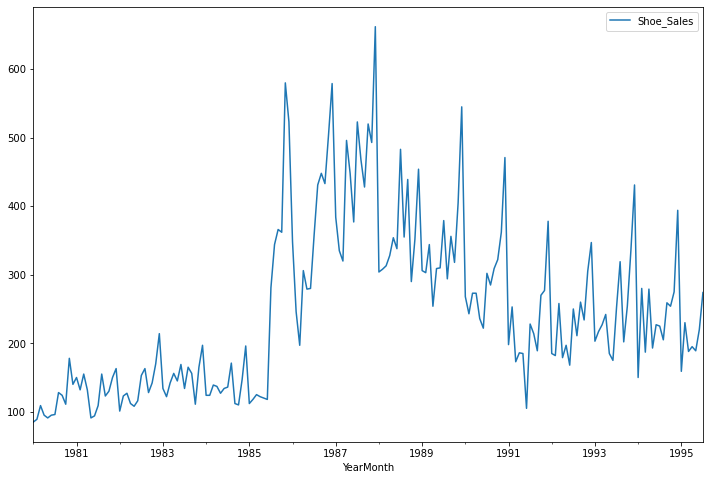

In [149]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

In [150]:
df.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


In [151]:
df.isnull().sum()

Shoe_Sales    0
dtype: int64

In [152]:
df.duplicated().sum()

42

In [153]:
df_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)

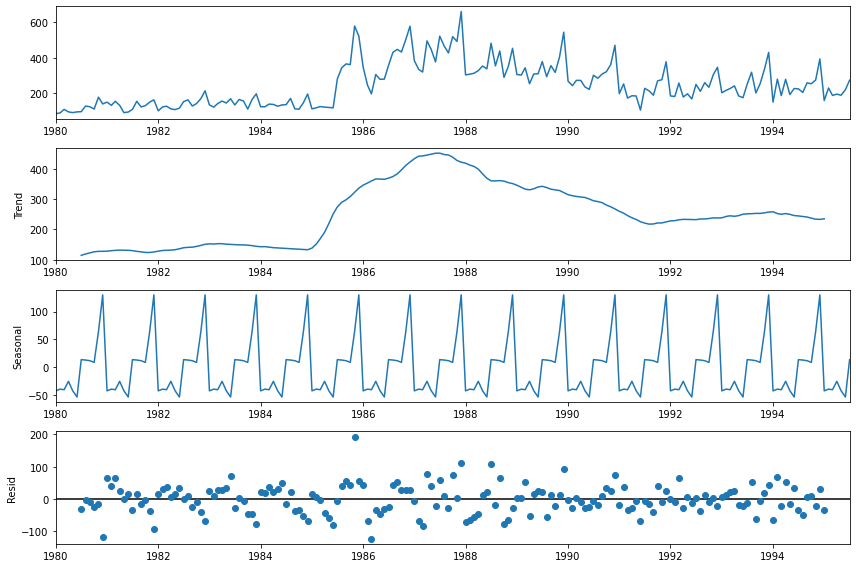

In [154]:
df_add_decompose.plot()
plt.show()

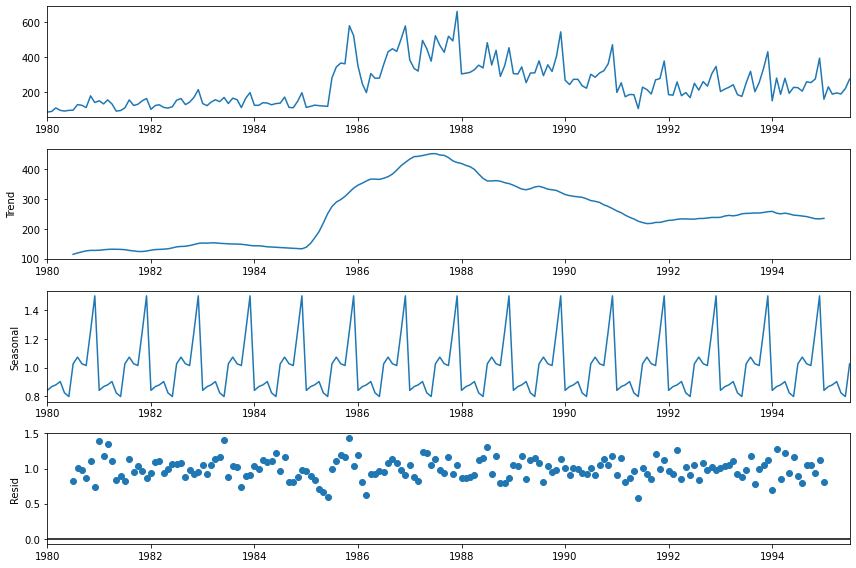

In [155]:
df_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df_mul_decompose.plot()
plt.show()

In [156]:
train=df['1980-01-01':'1990-12-01']
test=df['1991-01-01':]

In [157]:
train.tail()

,Shoe_Sales
YearMonth,
1990-08-01,285
1990-09-01,309
1990-10-01,322
1990-11-01,362
1990-12-01,471


In [158]:
test.head()

,Shoe_Sales
YearMonth,
1991-01-01,198
1991-02-01,253
1991-03-01,173
1991-04-01,186
1991-05-01,185


In [159]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


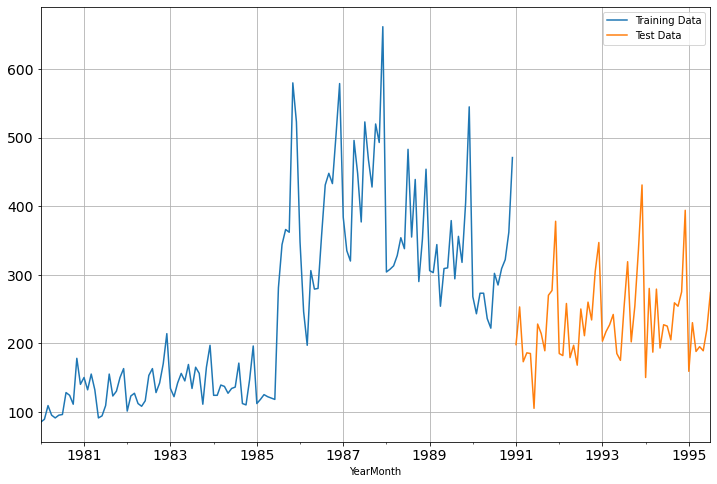

In [160]:
train['Shoe_Sales'].plot(fontsize=14)
test['Shoe_Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [161]:
#Model 1:Linear Regression.

In [162]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [163]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [164]:
from IPython.display import display

In [165]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Shoe_Sales,time
YearMonth,,
1980-01-01,85,1
1980-02-01,89,2
1980-03-01,109,3
1980-04-01,95,4
1980-05-01,91,5


Last few rows of Training Data


,Shoe_Sales,time
YearMonth,,
1990-08-01,285,128
1990-09-01,309,129
1990-10-01,322,130
1990-11-01,362,131
1990-12-01,471,132


First few rows of Test Data


,Shoe_Sales,time
YearMonth,,
1991-01-01,198,133
1991-02-01,253,134
1991-03-01,173,135
1991-04-01,186,136
1991-05-01,185,137


Last few rows of Test Data


,Shoe_Sales,time
YearMonth,,
1995-03-01,188,183
1995-04-01,195,184
1995-05-01,189,185
1995-06-01,220,186
1995-07-01,274,187


In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lr = LinearRegression()

In [168]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'])

LinearRegression()

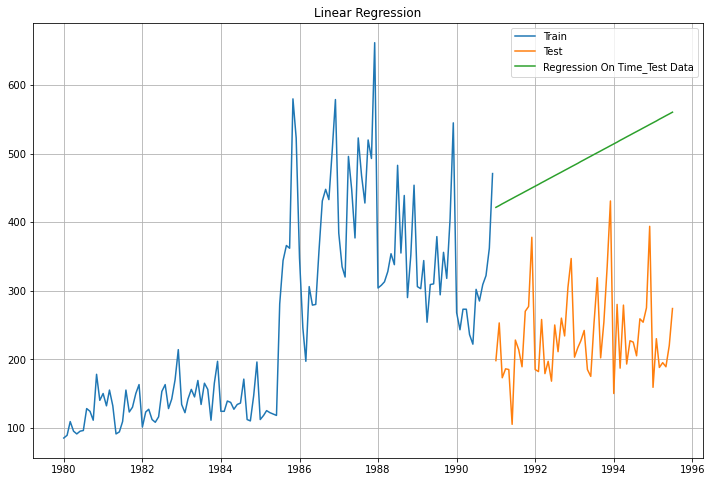

In [169]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression')
plt.legend(loc='best')
plt.grid();

In [170]:
from sklearn import metrics

In [171]:
rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)

In [172]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,266.276472


In [173]:
#Model2:Naive Approach.

In [174]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [175]:
train.tail()

,Shoe_Sales
YearMonth,
1990-08-01,285
1990-09-01,309
1990-10-01,322
1990-11-01,362
1990-12-01,471


In [176]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

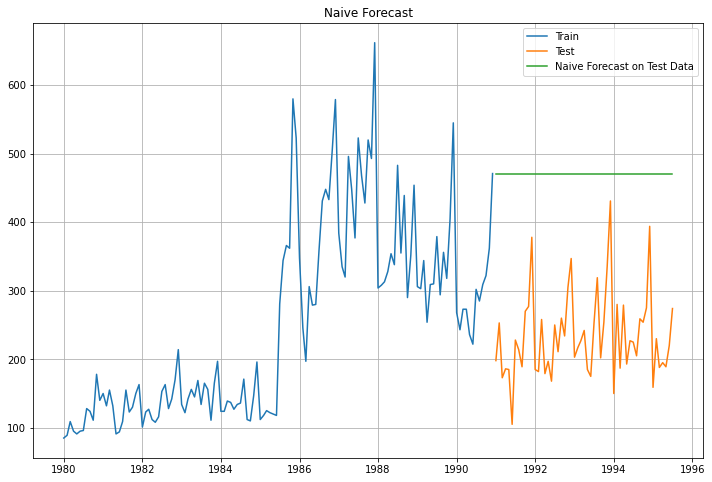

In [177]:
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [178]:
rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)

In [179]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306


In [180]:
#Model3:Simple Average.

In [181]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [182]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

,Shoe_Sales,mean_forecast
YearMonth,,
1991-01-01,198,250.575758
1991-02-01,253,250.575758
1991-03-01,173,250.575758
1991-04-01,186,250.575758
1991-05-01,185,250.575758


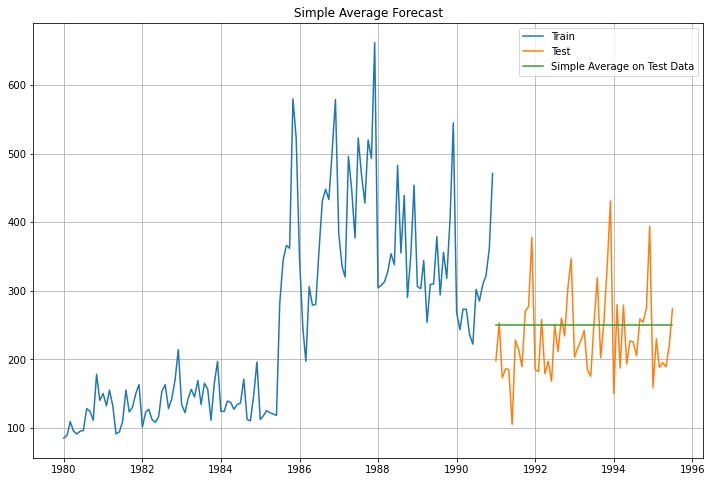

In [183]:
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [184]:
rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)

In [185]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570


In [186]:
#Model4:SES.

In [187]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [188]:
model_SES_autofit = model_SES.fit(optimized=True)

In [189]:
model_SES_autofit.params

{'smoothing_level': 0.6050502068914047,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.8281771466441,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [190]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    420.230009
1991-02-01    420.230009
1991-03-01    420.230009
1991-04-01    420.230009
1991-05-01    420.230009
1991-06-01    420.230009
1991-07-01    420.230009
1991-08-01    420.230009
1991-09-01    420.230009
1991-10-01    420.230009
1991-11-01    420.230009
1991-12-01    420.230009
1992-01-01    420.230009
1992-02-01    420.230009
1992-03-01    420.230009
1992-04-01    420.230009
1992-05-01    420.230009
1992-06-01    420.230009
1992-07-01    420.230009
1992-08-01    420.230009
1992-09-01    420.230009
1992-10-01    420.230009
1992-11-01    420.230009
1992-12-01    420.230009
1993-01-01    420.230009
1993-02-01    420.230009
1993-03-01    420.230009
1993-04-01    420.230009
1993-05-01    420.230009
1993-06-01    420.230009
1993-07-01    420.230009
1993-08-01    420.230009
1993-09-01    420.230009
1993-10-01    420.230009
1993-11-01    420.230009
1993-12-01    420.230009
1994-01-01    420.230009
1994-02-01    420.230009
1994-03-01    420.230009
1994-04-01    420.230009


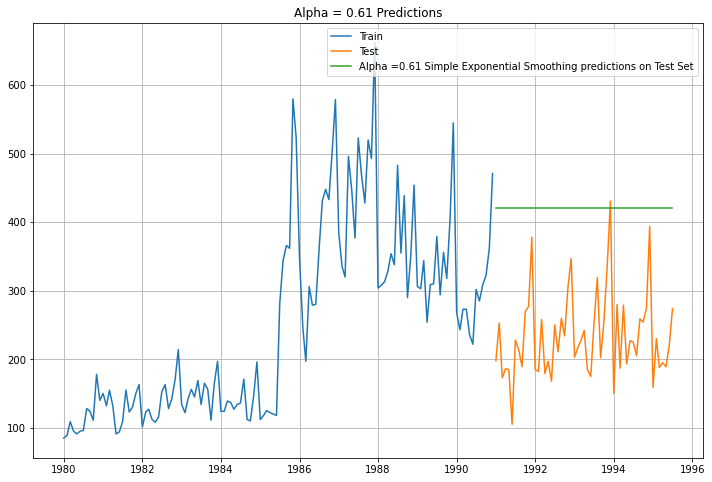

In [191]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.61 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.61 Predictions');

In [192]:
SES_RMSE=metrics.mean_squared_error(test.values,SES_predict.values,squared=False)

In [193]:
resultsDf_4= pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.61,SES'])

In [194]:
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.61,SES",196.404981


In [195]:
#Model5:DES.

In [196]:

model_DES = Holt(train,initialization_method='estimated')
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5943316174875876, 'smoothing_trend': 0.00027789072959209224, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.93343623476453, 'initial_trend': 3.3089919512707384, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [197]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    424.071641
1991-02-01    427.353656
1991-03-01    430.635671
1991-04-01    433.917686
1991-05-01    437.199701
1991-06-01    440.481716
1991-07-01    443.763731
1991-08-01    447.045746
1991-09-01    450.327761
1991-10-01    453.609777
1991-11-01    456.891792
1991-12-01    460.173807
1992-01-01    463.455822
1992-02-01    466.737837
1992-03-01    470.019852
1992-04-01    473.301867
1992-05-01    476.583882
1992-06-01    479.865897
1992-07-01    483.147912
1992-08-01    486.429927
1992-09-01    489.711942
1992-10-01    492.993957
1992-11-01    496.275972
1992-12-01    499.557987
1993-01-01    502.840003
1993-02-01    506.122018
1993-03-01    509.404033
1993-04-01    512.686048
1993-05-01    515.968063
1993-06-01    519.250078
1993-07-01    522.532093
1993-08-01    525.814108
1993-09-01    529.096123
1993-10-01    532.378138
1993-11-01    535.660153
1993-12-01    538.942168
1994-01-01    542.224183
1994-02-01    545.506198
1994-03-01    548.788214
1994-04-01    552.070229


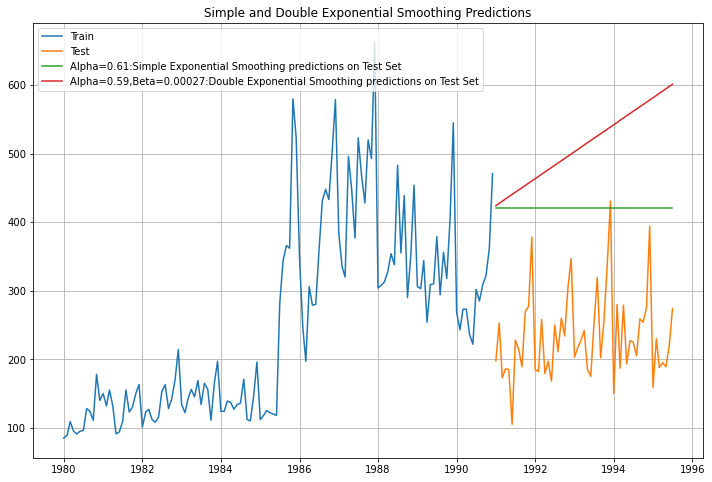

In [198]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.61:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [199]:
DES_RMSE=metrics.mean_squared_error(test.values,DES_predict.values,squared=False)

In [200]:
resultsDf_5= pd.DataFrame({'Test RMSE': [em.rmse(test.values,DES_predict.values)[0]]},index=['Alpha=0.59,Beta=0.00027,DES'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.61,SES",196.404981
"Alpha=0.59,Beta=0.00027,DES",200.055506


In [201]:
#Model6:Holt-Winter's model.

In [237]:
model_TES = ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.47709242148774617, 'smoothing_trend': 0.0008983841087711093, 'smoothing_seasonal': 0.012776293232241049, 'damping_trend': nan, 'initial_level': 138.88686773682235, 'initial_trend': 0.8930703875809105, 'initial_seasons': array([-54.83600325, -47.20613107, -52.32147453, -38.1519244 ,
       -53.11056663, -62.43985534,   6.65119228,   1.4428618 ,
         2.37438027,  -2.16142089,  53.8050837 , 124.89551148]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [238]:
TES_predict =  model_TES.forecast(12)
TES_predict

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1995-08-01    267.734317
1995-09-01    269.208522
1995-10-01    265.875866
1995-11-01    322.390729
1995-12-01    393.775764
1996-01-01    215.703253
1996-02-01    224.156159
1996-03-01    220.157882
1996-04-01    234.862117
1996-05-01    220.602417
1996-06-01    212.502119
1996-07-01    281.505599
Freq: MS, dtype: float64

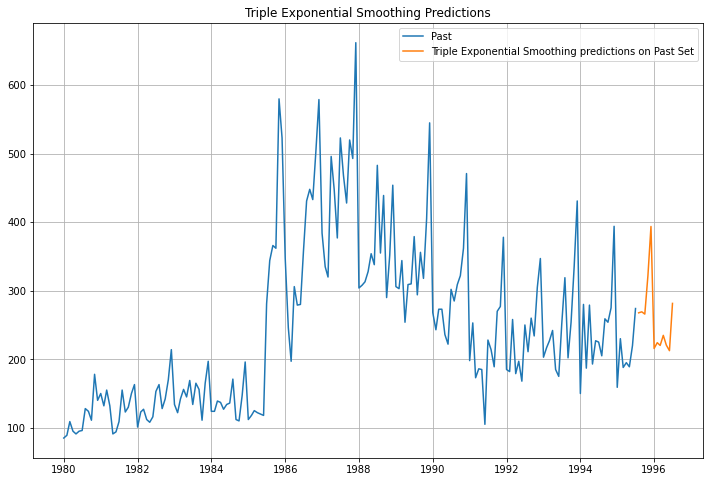

In [239]:
plt.plot(df, label='Past')
#plt.plot(test, label='Test')

#plt.plot(SES_predict, label='Alpha=0.61:Simple Exponential Smoothing predictions on Test Set')
#plt.plot(DES_predict, label='Alpha=0.59,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Past Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [205]:
TES_RMSE=metrics.mean_squared_error(test.values,TES_predict.values,squared=False)

In [206]:
resultsDf_6 = pd.DataFrame({'Test RMSE':[em.rmse(test.values,TES_predict.values)[0]]},index=['Alpha=0.57,Beta=0.0001,Gamma=0.29,TES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.61,SES",196.404981
"Alpha=0.59,Beta=0.00027,DES",200.055506
"Alpha=0.57,Beta=0.0001,Gamma=0.29,TES",63.466721


In [207]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')

model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5711157198466311, 'smoothing_trend': 0.00017713316321637593, 'smoothing_seasonal': 0.20296107264692106, 'damping_trend': nan, 'initial_level': 116.3580967226791, 'initial_trend': 0.18632216059567813, 'initial_seasons': array([1.05780986, 1.01189726, 1.24115099, 1.39957871, 1.32118973,
       1.08364401, 1.17797484, 1.50436865, 1.7230359 , 1.4706514 ,
       1.75499475, 1.92180025]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [208]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    261.484834
1991-02-01    243.302764
1991-03-01    257.450643
1991-04-01    270.718047
1991-05-01    267.921028
1991-06-01    257.575455
1991-07-01    340.480682
1991-08-01    316.696470
1991-09-01    341.324225
1991-10-01    316.138731
1991-11-01    377.599950
1991-12-01    468.486098
1992-01-01    264.376023
1992-02-01    245.990441
1992-03-01    260.291991
1992-04-01    273.703075
1992-05-01    270.872503
1992-06-01    260.410359
1992-07-01    344.224616
1992-08-01    320.175684
1992-09-01    345.070568
1992-10-01    319.605470
1992-11-01    381.736885
1992-12-01    473.614087
1993-01-01    267.267212
1993-02-01    248.678118
1993-03-01    263.133339
1993-04-01    276.688103
1993-05-01    273.823977
1993-06-01    263.245262
1993-07-01    347.968549
1993-08-01    323.654897
1993-09-01    348.816911
1993-10-01    323.072208
1993-11-01    385.873819
1993-12-01    478.742076
1994-01-01    270.158401
1994-02-01    251.365795
1994-03-01    265.974686
1994-04-01    279.673130


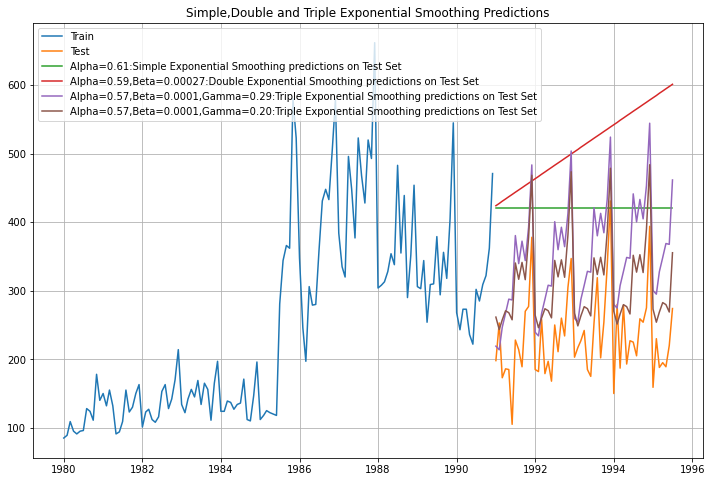

In [209]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.61:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.00027:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.57,Beta=0.0001,Gamma=0.29:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.57,Beta=0.0001,Gamma=0.20:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [210]:
TES_am_RMSE=metrics.mean_squared_error(test.values,TES_predict_am.values,squared=False)

In [212]:
resultsDf_7= pd.DataFrame({'Test RMSE': [em.rmse(test.values,TES_predict_am.values)[0]]},index=['Alpha=0.57,Beta=0.0001,Gamma=0.20,TES'])
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.61,SES",196.404981
"Alpha=0.59,Beta=0.00027,DES",200.055506
"Alpha=0.57,Beta=0.0001,Gamma=0.29,TES",63.466721
"Alpha=0.57,Beta=0.0001,Gamma=0.20,TES",67.671603
"Alpha=0.57,Beta=0.0001,Gamma=0.20,TES",67.671603


In [213]:
#Stationarity.

In [214]:
from statsmodels.tsa.stattools import adfuller

In [215]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.577
DF test p-value is 0.801418623453652
Number of lags used 13


In [216]:
#p-value>0.05

In [217]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.532
DF test p-value is 0.03611703400135965
Number of lags used 12


Text(0.5, 1.0, 'Stationary Time Series')

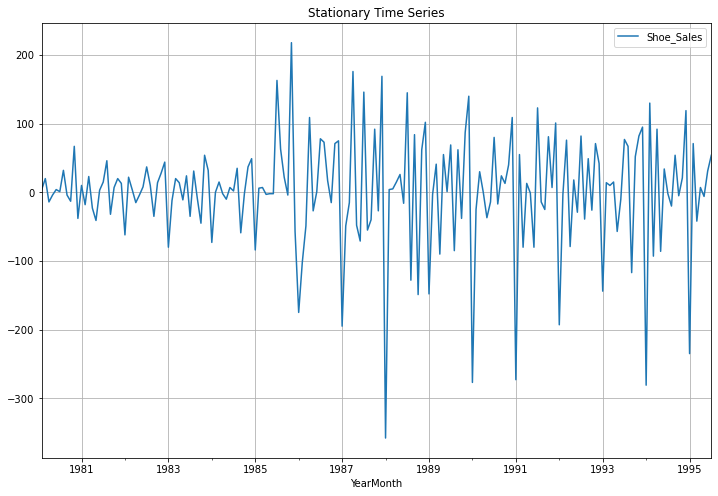

In [219]:
df.diff().dropna().plot(grid=True);
plt.title('Stationary Time Series')

In [220]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

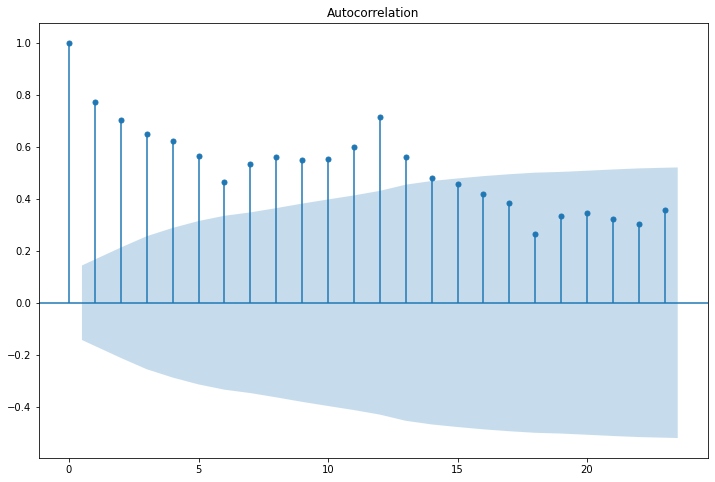

In [221]:
plot_acf(df,alpha=0.05);

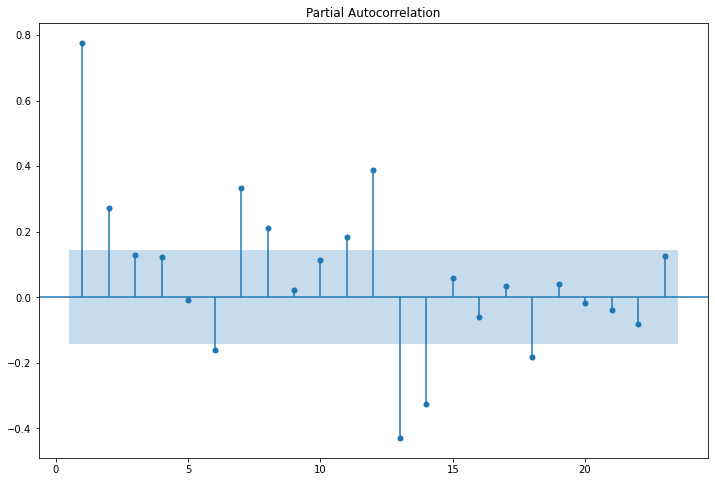

In [222]:
plot_pacf(df,zero=False,alpha=0.05);

In [223]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [224]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [225]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1508.2837722095962
ARIMA(0, 1, 1) - AIC:1497.05032241879
ARIMA(0, 1, 2) - AIC:1494.9646053663414
ARIMA(0, 1, 3) - AIC:1495.1484738738654
ARIMA(1, 1, 0) - AIC:1501.6431242011586
ARIMA(1, 1, 1) - AIC:1492.4871865078962
ARIMA(1, 1, 2) - AIC:1494.423859457795
ARIMA(1, 1, 3) - AIC:1496.3858782557886
ARIMA(2, 1, 0) - AIC:1498.9504830258993
ARIMA(2, 1, 1) - AIC:1494.4314983035567
ARIMA(2, 1, 2) - AIC:1496.4107391786974


C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1480.7897366077386
ARIMA(3, 1, 0) - AIC:1498.9303094224947
ARIMA(3, 1, 1) - AIC:1496.346864104913


C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1495.65585454837
ARIMA(3, 1, 3) - AIC:1479.6877098139014


In [226]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
15,"(3, 1, 3)",1479.687710
11,"(2, 1, 3)",1480.789737
5,"(1, 1, 1)",1492.487187
6,"(1, 1, 2)",1494.423859
9,"(2, 1, 1)",1494.431498


In [227]:
auto_ARIMA = ARIMA(train, order=(3,1,3))
results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -732.844
Date:                Thu, 03 Nov 2022   AIC                           1479.688
Time:                        18:52:17   BIC                           1499.814
Sample:                    01-01-1980   HQIC                          1487.866
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5605      0.117      4.802      0.000       0.332       0.789
ar.L2         -1.0068      0.022    -45.270      0.000      -1.050      -0.963
ar.L3          0.5438      0.119      4.572      0.0

In [228]:
from sklearn.metrics import mean_squared_error

In [229]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [231]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
rmse

135.81858986234081

In [232]:
resultsDf_8=pd.DataFrame({'Test RMSE': rmse},index=['ARIMA(3,1,3)'])

resultsDf=pd.concat([resultsDf,resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.61,SES",196.404981
"Alpha=0.59,Beta=0.00027,DES",200.055506
"Alpha=0.57,Beta=0.0001,Gamma=0.29,TES",63.466721
"Alpha=0.57,Beta=0.0001,Gamma=0.20,TES",67.671603
"Alpha=0.57,Beta=0.0001,Gamma=0.20,TES",67.671603
"ARIMA(3,1,3)",135.818590


In [233]:
manual_ARIMA = ARIMA(train['Shoe_Sales'], order=(2,1,6))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 6)   Log Likelihood                -728.198
Date:                Thu, 03 Nov 2022   AIC                           1474.395
Time:                        22:50:22   BIC                           1500.272
Sample:                    01-01-1980   HQIC                          1484.910
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0018      0.017      0.102      0.918      -0.033       0.036
ar.L2         -0.9996      0.001  -1204.517      0.000      -1.001      -0.998
ma.L1         -0.3620      0.086     -4.227      0.0

C:\Users\Sayan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [234]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [235]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA,squared=False)

In [236]:
resultsDf_9 = pd.DataFrame({'Test RMSE': rmse},index=['ARIMA(2,1,6)'])


resultsDf= pd.concat([resultsDf,resultsDf_9])

resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.61,SES",196.404981
"Alpha=0.59,Beta=0.00027,DES",200.055506
"Alpha=0.57,Beta=0.0001,Gamma=0.29,TES",63.466721
"Alpha=0.57,Beta=0.0001,Gamma=0.20,TES",67.671603
"Alpha=0.57,Beta=0.0001,Gamma=0.20,TES",67.671603
"ARIMA(3,1,3)",135.818590
"ARIMA(2,1,6)",126.844965
